In [ ]:
from numpy import unique # For finding unique elements
from numpy import argmax  # For finding the index of the maximum value
from pandas import read_csv  # For reading data from CSV files into DataFrames
from tensorflow.keras.models import Sequential  # For creating a sequential neural network model
from tensorflow.keras.layers import Dense  # For creating fully connected neural network layers
from sklearn.metrics import accuracy_score  # For calculating classification accuracy
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels

In [ ]:
# Define the URL to the dataset CSV file
url = 'dataset.csv'

# Read the CSV file into a DataFrame without considering the first row as headers
dataframe = read_csv(url, header=None)

# Extract the values from the DataFrame and store them in a variable 'dataset'
dataset = dataframe.values

# The code reads a dataset from a CSV file and stores it in the 'dataset' variable for further processing.

In [ ]:
# Display the first few rows of the DataFrame 'dataframe'
# This code displays the top rows (typically the first five rows) of the loaded dataset stored in 'dataframe'.
# The columns are Accx,Accy,Accz,Gyrx,Gyry,Gyrz,Magx,Magy,Magz and orientation class
dataframe.head()

,0,1,2,3,4,5,6,7,8,9
0,0.063094,0.390562,1.571427,-58.515457,-9.428294,11.790896,5.008872,-26.301874,30.542972,1
1,0.074649,-0.157481,0.958330,1.702279,-6.904296,-27.892683,2.161393,-21.268899,33.983140,1
2,-0.113500,0.095557,1.018073,0.896224,-6.254275,-10.133861,3.285302,-21.938269,22.097793,1
3,0.039250,-0.156121,0.896122,-0.482265,-5.217253,40.921852,1.206292,-19.442905,15.152716,1
4,-0.104266,-0.102749,1.063787,2.421552,-7.050641,-60.904564,0.070042,-21.473195,3.747143,1


In [ ]:
# Split the dataset into features (X) and labels (y)
X, y = dataset[:, 0:-1], dataset[:, -1]

# Convert the feature and label data to float data type
X, y = X.astype('float'), y.astype('float')

# In this code block, the dataset is split into two arrays:
# - X: The feature array containing all columns except the last one (input data)
# - y: The label array containing only the last column (output or target data)
# The '.astype('float')' method is used to ensure that both X and y contain float data types.

In [ ]:
# Determine the number of features (columns) in the input data
n_features = X.shape[1]

In [ ]:
# Encode the target labels into numerical values
y = LabelEncoder().fit_transform(y)

# Calculate the number of unique classes in the target labels
n_class = len(unique(y))

# 'y' now contains encoded target labels, and 'n_class' represents the count of unique classes.

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# Split the dataset into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.4, random_state=1)

# Further split the evaluation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=1)


In [ ]:
y_train

array([3, 2, 1, ..., 0, 2, 0])

# Model creation

# With ReLU activation

In [ ]:
def model_training(activation):
  # Create a sequential model
    model = Sequential()
    # Add the input layer with 8 units and specified activation function
    model.add(Dense(8, input_dim=n_features, activation=activation, kernel_initializer='he_normal'))
    # Add a hidden layer with 6 units and the same activation function
    model.add(Dense(6, activation=activation, kernel_initializer='he_normal'))
    # Add the output layer with 'n_class' units and softmax activation
    model.add(Dense(n_class, activation='softmax'))
    # Compile the model with sparse categorical cross-entropy loss and Adam optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

    # Set the number of training epochs
    epochs = 100

    # Initialize lists to store training and validation losses
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
    # Fit the model on the training data for one epoch
        model.fit(X_train, y_train, epochs=1, batch_size=10, verbose=0)

        # Evaluate the model on the training data
        train_scores = model.evaluate(X_train, y_train, verbose=0)
        train_loss = train_scores

        # Evaluate the model on the validation data
        val_scores = model.evaluate(X_val, y_val, verbose=0)
        val_loss = val_scores

        # Print and record both training and validation scores
        print(f"----------  Epoch {epoch+1}/{epochs}  -----------")
        print(f"Training : {train_loss:.5f} | Validation : {val_loss:.5f}")

        train_losses.append(train_loss)
        val_losses.append(val_loss)
 # Return the trained model and the lists of training and validation losses
    return model, train_losses, val_losses

In [ ]:
model_relu, train_losses, val_losses = model_training('relu')
# Train the model with ReLU activation

----------  Epoch 1/100  -----------
Training : 3.28128 | Validation : 3.27967
----------  Epoch 2/100  -----------
Training : 1.34077 | Validation : 1.35197
----------  Epoch 3/100  -----------
Training : 1.05374 | Validation : 1.06462
----------  Epoch 4/100  -----------
Training : 0.92166 | Validation : 0.92752
----------  Epoch 5/100  -----------
Training : 0.82441 | Validation : 0.82699
----------  Epoch 6/100  -----------
Training : 0.73430 | Validation : 0.73255
----------  Epoch 7/100  -----------
Training : 0.64716 | Validation : 0.64751
----------  Epoch 8/100  -----------
Training : 0.58057 | Validation : 0.58127
----------  Epoch 9/100  -----------
Training : 0.52292 | Validation : 0.52417
----------  Epoch 10/100  -----------
Training : 0.49646 | Validation : 0.49741
----------  Epoch 11/100  -----------
Training : 0.45110 | Validation : 0.45144
----------  Epoch 12/100  -----------
Training : 0.43694 | Validation : 0.43715
----------  Epoch 13/100  -----------
Training : 

# Metrics

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


def get_classification_metrics(model, X_data, y_data):

    # Assuming y_true contains the true class labels and y_pred is the predicted labels from Step 7
    # Calculate the confusion matrix
    y_pred = model.predict(X_data) # Predict labels using the trained model
    y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
    confusion_matrix_ = confusion_matrix(y_data, y_pred) # Calculate the confusion matrix

    # Calculate classification accuracy
    accuracy = accuracy_score(y_data, y_pred)  # Calculate accuracy by comparing true and predicted labels

    # Print the confusion matrix and accuracy for Step 7
    print("Confusion Matrix :\n", confusion_matrix_)
    print("Accuracy :", accuracy)

    # Generate a classification report
    report = classification_report(y_data, y_pred) # Generate a classification report with precision, recall, F1-score, and support
    print(report)

In [ ]:
# function to calculate and print classification metrics for the trained model_relu using the validation data
get_classification_metrics(model_relu, X_val, y_val)

136/136 [==============================] - 0s 1ms/step
Confusion Matrix :
 [[ 835    0    0    0   11]
 [   0 1074    1    0    3]
 [   1    0 1272    0    5]
 [   0    0    0  673   11]
 [  13   18    4   25  401]]
Accuracy : 0.9788359788359788
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       846
           1       0.98      1.00      0.99      1078
           2       1.00      1.00      1.00      1278
           3       0.96      0.98      0.97       684
           4       0.93      0.87      0.90       461

    accuracy                           0.98      4347
   macro avg       0.97      0.97      0.97      4347
weighted avg       0.98      0.98      0.98      4347



In [ ]:
get_classification_metrics(model_relu, X_test, y_test) #calculate and print classification metrics for the trained

136/136 [==============================] - 0s 2ms/step
Confusion Matrix :
 [[ 792    0    0    0   12]
 [   0 1108    3    0    7]
 [   1    0 1298    0    7]
 [   0    0    0  688    9]
 [  22   19    7   28  347]]
Accuracy : 0.9735510579576817
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       804
           1       0.98      0.99      0.99      1118
           2       0.99      0.99      0.99      1306
           3       0.96      0.99      0.97       697
           4       0.91      0.82      0.86       423

    accuracy                           0.97      4348
   macro avg       0.96      0.96      0.96      4348
weighted avg       0.97      0.97      0.97      4348



# Graph

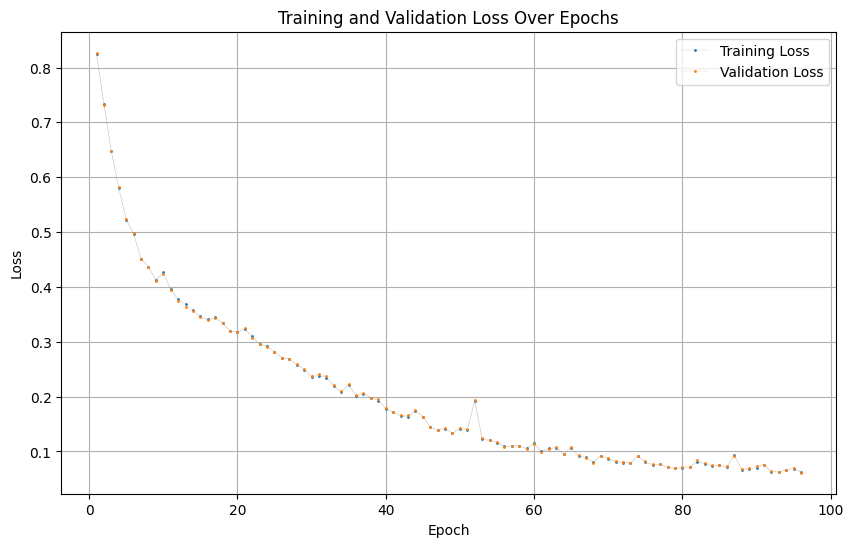

In [ ]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, val_losses):
    # Assuming 'evaluation' is a list of tuples with (train_loss, val_loss)
    # train_losses, val_losses = zip(*evaluation)

    # Remove the first 4 epochs (for better visualization)
    train_losses = train_losses[4:]
    val_losses = val_losses[4:]
    # Create a plot for training and validation losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o', linewidth=0.1, markersize=1.0)
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o', linewidth=0.1, markersize=1.0)

    plt.title('Training and Validation Loss Over Epochs')  # Set the title of the plot
    plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
    plt.ylabel('Loss')  # Label the y-axis as 'Loss'
    plt.legend()  # Display a legend for the two lines
    plt.grid(True)  # Add a grid to the plot
    plt.show()  # Show the plot

# Plot training and validation losses
plot_losses(train_losses, val_losses)  # Call the plot_losses function with the provided loss data

# With Tanh activation


In [ ]:
# Train a neural network model using the tanh activation function

# Call the model_training function with 'tanh' activation
model_tanh, train_losses_tanh, val_losses_tanh = model_training('tanh')

----------  Epoch 1/100  -----------
Training : 1.05633 | Validation : 1.05942
----------  Epoch 2/100  -----------
Training : 0.93103 | Validation : 0.93529
----------  Epoch 3/100  -----------
Training : 0.83390 | Validation : 0.83679
----------  Epoch 4/100  -----------
Training : 0.76854 | Validation : 0.77112
----------  Epoch 5/100  -----------
Training : 0.70819 | Validation : 0.70888
----------  Epoch 6/100  -----------
Training : 0.66826 | Validation : 0.66650
----------  Epoch 7/100  -----------
Training : 0.62647 | Validation : 0.62548
----------  Epoch 8/100  -----------
Training : 0.58138 | Validation : 0.58254
----------  Epoch 9/100  -----------
Training : 0.53975 | Validation : 0.54053
----------  Epoch 10/100  -----------
Training : 0.51384 | Validation : 0.51497
----------  Epoch 11/100  -----------
Training : 0.48981 | Validation : 0.49064
----------  Epoch 12/100  -----------
Training : 0.46726 | Validation : 0.46996
----------  Epoch 13/100  -----------
Training : 

In [ ]:
# Call the get_classification_metrics function with the specified model and data
get_classification_metrics(model_tanh, X_val, y_val)

136/136 [==============================] - 0s 2ms/step
Confusion Matrix :
 [[ 804    0    2   19   21]
 [   0 1061    0    0   17]
 [   1    0 1268    1    8]
 [   0    0    2  677    5]
 [  75   22   24  117  223]]
Accuracy : 0.9277662755923626
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       846
           1       0.98      0.98      0.98      1078
           2       0.98      0.99      0.99      1278
           3       0.83      0.99      0.90       684
           4       0.81      0.48      0.61       461

    accuracy                           0.93      4347
   macro avg       0.90      0.88      0.88      4347
weighted avg       0.93      0.93      0.92      4347



In [ ]:
# Call the get_classification_metrics function with the specified model and test data
get_classification_metrics(model_tanh, X_test, y_test)

136/136 [==============================] - 0s 1ms/step
Confusion Matrix :
 [[ 764    0    5   11   24]
 [   0 1098    5    0   15]
 [   7    1 1289    1    8]
 [   0    0    6  686    5]
 [  77   29   24  116  177]]
Accuracy : 0.9231830726770929
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       804
           1       0.97      0.98      0.98      1118
           2       0.97      0.99      0.98      1306
           3       0.84      0.98      0.91       697
           4       0.77      0.42      0.54       423

    accuracy                           0.92      4348
   macro avg       0.89      0.86      0.87      4348
weighted avg       0.92      0.92      0.91      4348



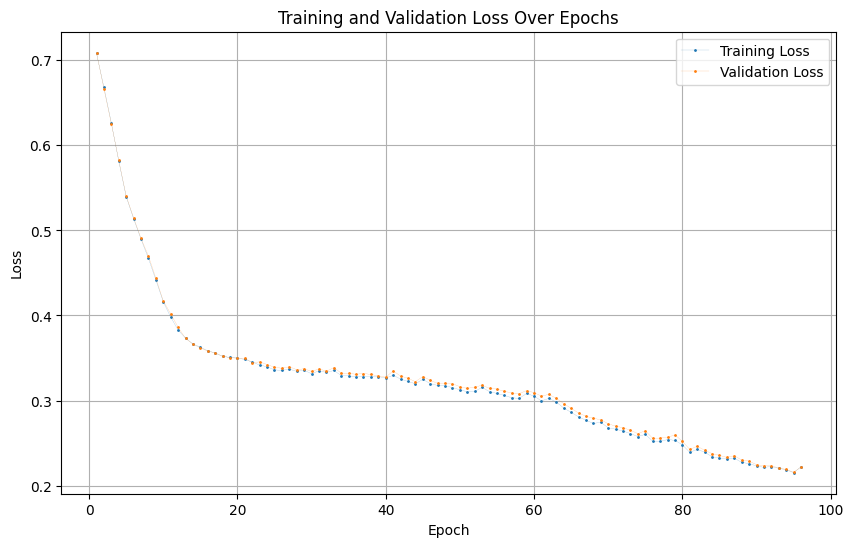

In [ ]:
# Call the plot_losses function with the specified training and validation loss data
plot_losses(train_losses_tanh, val_losses_tanh)

# With Sigmoid activation


In [ ]:
# Train a neural network model using the sigmoid activation function
# and store the model, training losses, and validation losses in variables.
model_sigmoid, train_losses_sigmoid, val_losses_sigmoid = model_training('sigmoid')

----------  Epoch 1/100  -----------
Training : 1.39470 | Validation : 1.39534
----------  Epoch 2/100  -----------
Training : 1.18571 | Validation : 1.18732
----------  Epoch 3/100  -----------
Training : 1.00118 | Validation : 1.00348
----------  Epoch 4/100  -----------
Training : 0.83911 | Validation : 0.84207
----------  Epoch 5/100  -----------
Training : 0.72579 | Validation : 0.72911
----------  Epoch 6/100  -----------
Training : 0.63673 | Validation : 0.63984
----------  Epoch 7/100  -----------
Training : 0.56718 | Validation : 0.56920
----------  Epoch 8/100  -----------
Training : 0.51816 | Validation : 0.51984
----------  Epoch 9/100  -----------
Training : 0.48417 | Validation : 0.48471
----------  Epoch 10/100  -----------
Training : 0.45863 | Validation : 0.45855
----------  Epoch 11/100  -----------
Training : 0.43766 | Validation : 0.43765
----------  Epoch 12/100  -----------
Training : 0.42054 | Validation : 0.42110
----------  Epoch 13/100  -----------
Training : 

In [ ]:
# Calculate and print classification metrics for the model trained with sigmoid activation.
get_classification_metrics(model_sigmoid, X_val, y_val)

136/136 [==============================] - 0s 1ms/step
Confusion Matrix :
 [[ 804    0    1    0   41]
 [   0 1069    0    0    9]
 [   1    0 1275    0    2]
 [   0    0    2  658   24]
 [  65    5    6   32  353]]
Accuracy : 0.9567517828387394
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       846
           1       1.00      0.99      0.99      1078
           2       0.99      1.00      1.00      1278
           3       0.95      0.96      0.96       684
           4       0.82      0.77      0.79       461

    accuracy                           0.96      4347
   macro avg       0.94      0.93      0.94      4347
weighted avg       0.96      0.96      0.96      4347



In [ ]:
# Calculate and print classification metrics for the model trained with sigmoid activation. with test data
get_classification_metrics(model_sigmoid, X_test, y_test)

136/136 [==============================] - 0s 2ms/step
Confusion Matrix :
 [[ 769    0    0    0   35]
 [   0 1104    2    0   12]
 [   2    0 1300    1    3]
 [   0    0    5  660   32]
 [  74    8   10   31  300]]
Accuracy : 0.9505519779208832
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       804
           1       0.99      0.99      0.99      1118
           2       0.99      1.00      0.99      1306
           3       0.95      0.95      0.95       697
           4       0.79      0.71      0.75       423

    accuracy                           0.95      4348
   macro avg       0.93      0.92      0.92      4348
weighted avg       0.95      0.95      0.95      4348



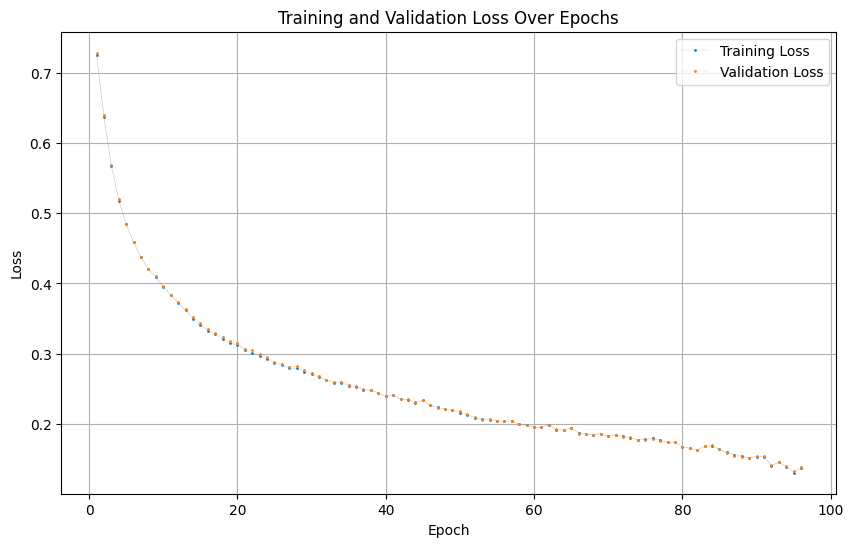

In [ ]:
# Plot training and validation losses for the model trained with sigmoid activation.
plot_losses(train_losses_sigmoid, val_losses_sigmoid)